# 20163228 Yuseon Nam

In [1]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math

In [2]:
# Distance function between two vectors x and y
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    
    return(s)



# Plot image
def plot_image(img) :
    plt.imshow(img)
    plt.axis('off')
 
    
# Plot energy
def plot_energy(energy) :
    plt.plot(energy)
    plt.show()

In [3]:
class KMeans() :
    def __init__(self, k) :
        self.k = k
        self.centroid_color = np.zeros((self.k, 3), dtype="long")
        self.centroid_count = np.zeros(self.k, dtype="int")
        self.energy_list = []
        
        
    def init_centroid(self) :
        for i in range(pix_size) :
            rand_label = random.randint(0, self.k-1)
            self.cur_center_label[i] = rand_label

    
    
    def update_centroid(self) :       
        self.centroid_color = np.zeros((self.k, 3), dtype="int")
        self.centroid_count = np.zeros(self.k, dtype="int")
        
        for i in range (pix_size) :
            label = self.cur_center_label[i]
            self.centroid_color[label, :] += pix[i, :]
            self.centroid_count[label]    += 1
            
        for i in range (self.k) :
            if (self.centroid_count[i] != 0) :
                self.centroid_color[i] //= self.centroid_count[i]
            
            
    def labeling(self) :
        energy_sum_list = []
        
        # Label for each pixel
        for i in range (pix_size) :    
            # Calculate distance between each centroid and pix
            dist_sum = []
            for j in range (self.k) :
                dist_sum.append(distance(pix[i, :], self.centroid_color[j, :]))
                
            # Find minimum distance and it index
            min_dist  = min(dist_sum)
            min_index = dist_sum.index(min_dist)
            
            # Put index in the label
            self.cur_center_label[i] = min_index
            
            # Calculate Energy
            # Done this way because of overflow in int
            energy_sum_list.append(min_dist)
            
        return energy_sum_list

    
    def calculate_energy(self, energy) :
        energy = energy / pix_size
        energy_sum = np.sum(energy)
        
        return energy_sum
    
    
    def make_image(self) :
        kmeans_img_list = np.zeros((pix_size, 3), dtype="uint8")
        
        for i in range (pix_size) :
            label = self.cur_center_label[i]
            kmeans_img_list[i, :] = self.centroid_color[label, :]
            
        kmeans_img = kmeans_img_list.reshape(row_size, col_size, 3)
        
        return (kmeans_img)
        
        
    def train(self) :
        
        self.cur_center_label  = np.zeros(pix_size, dtype="uint8")
        self.prev_center_label = np.zeros(pix_size, dtype="uint8")
        
        iter = 0
        
        self.init_centroid()
        
        # One iteration
        while not (np.array_equal(self.cur_center_label, self.prev_center_label)) :
            
            iter += 1
            
            self.update_centroid()   # Get the color of centroid
            
            self.prev_center_label = copy.deepcopy(self.cur_center_label)
            
            energy = self.labeling()
            
            self.energy_list.append(self.calculate_energy(energy))
            
            
        # Make cur_center_label as image
        kmeans_img = self.make_image()
        
        # Make cur_center_label as image
        kmeans_img = self.make_image()
        
        return (kmeans_img, self.energy_list)
        
        

(771, 420, 3)
<class 'numpy.uint8'>
(323820, 3)


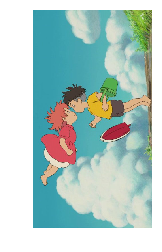

In [4]:
# Read image
im = pilimg.open("img2.jpg")

# Make and image as array
img = np.array(im)

# Show image
plt.imshow(img)
plt.axis('off')

# Check image size
print(np.shape(img))
print(type(img[0][0][0]))

row_size = len(img)
col_size = len(img[0])

# Resize Image
pix     = img.reshape(row_size * col_size, 3)
pix_size = len(pix)
print(np.shape(pix))

### K = 2

C:\Users\ys\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in int_scalars


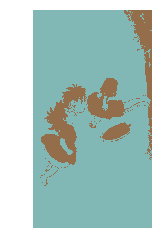

In [ ]:
k_two = KMeans(2)
k_two_image, k_two_energy = k_two.train()
plot_image(k_two_image)

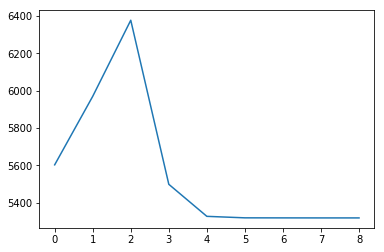

In [ ]:
plot_energy(k_two_energy)

### K = 4

C:\Users\ys\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in int_scalars


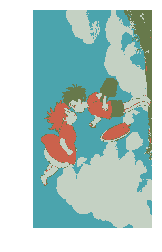

In [ ]:
k_four = KMeans(4)
k_four_image, k_four_energy = k_four.train()
plot_image(k_four_image)

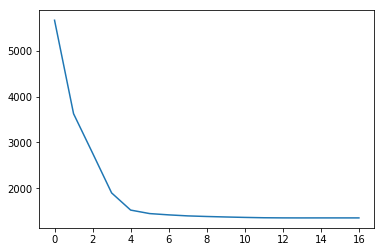

In [ ]:
plot_energy(k_four_energy)

### K = 8

In [ ]:
k_eight = KMeans(8)
k_eight_image, k_eight_energy = k_eight.train()
plot_image(k_eight_image)

C:\Users\ys\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in int_scalars


In [ ]:
plot_energy(k_eight_energy)

### K = 16

In [ ]:
k_sixteen = KMeans(16)
k_sixteen_image, k_sixteen_energy = k_sixteen.train()
plot_image(k_sixteen_image)

In [ ]:
plot_energy(k_sixteen_energy)